<a href="https://colab.research.google.com/github/erickyudha/linear-regression_world_hapiness/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 1 Laboratorium Kecerdasan Buatan - Regresi Linear**
Erick Yudha Pratama Sukku / 201401046

Topik:
***Analisis Korelasi GDP Negara dengan Tingkat Kebahagiaan***

Di tugas ini, anda bertugas untuk melakukan beberapa hal. 

* **Tugas pertama yang anda harus lakukan adalah mengumpulkan dataset yang ingin anda gunakan, membangun dataset baru sesuai kebutuhan anda, membersihkan, dan memvalidasi dataset tersebut.**

* **Tugas kedua adalah menganalisa data untuk tiap-tiap variabel, dan memastikan hubungan antar variabel, dan menemukan kesimpulan tentang data yang anda miliki.**

* **Tugas ketiga adalah menggunakan kesimpulan tadi, untuk melihat data mana saja yang cocok digunakan untuk membangun model regresi. Anda juga ditugaskan untuk membangun dan memvisualisasikan model regresi linear tersebut.**

## Import Library

Disini lakukan import terhadap library yang anda butuhkan. Ingat bahwa anda perlu melakukan pengumpulan dan membangun dataset, memahami kondisi data secara visual, melihat kondisi statistik deskriptif dan persebaran data.

In [105]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization
from scipy import stats           # Untuk statistik

## Load Dataset

Disini, anda akan menghubungkan sumber data anda kedalam notebook. Lalu, anda akan memasukkan dataset-dataset yang anda gunakan kedalam program disini.

Sumber Dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness

In [106]:
# Download Dataset dari Github
!wget https://raw.githubusercontent.com/erickyudha/linear-regression_world_hapiness/main/main.csv

--2023-04-28 13:51:40--  https://raw.githubusercontent.com/erickyudha/linear-regression_world_hapiness/main/main.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17290 (17K) [text/plain]
Saving to: ‘main.csv.1’

main.csv.1          100%[===================>]  16.88K  --.-KB/s    in 0.001s  

2023-04-28 13:51:40 (28.6 MB/s) - ‘main.csv.1’ saved [17290/17290]



In [107]:
# Load CSV
data = pd.read_csv('main.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


## Data Preprocessing

Disini, tugas anda adalah melakukan beberapa ***treatment***, atau "tindakan" terhadap data. Anda akan mengubah susunan dan bentuk data, pembersihan, dan validasi.

### Data Wrangling

Langkah pertama hapus kolom yang tidak digunakan dalam analisis. Karena topik analisis adalah ***Analisis Korelasi GDP Negara dengan Tingkat Kebahagiaan***. Semua kolom selain **Economy (GDP per Capita)** dan **Happiness Score** dihapus karena kurang relevan.

In [108]:
# Hapus semua duplikat kolom negara
data = data.drop_duplicates(subset='Country')

In [109]:
# Hapus semua kolom selain tiga diatas.
data = data[["Economy (GDP per Capita)", "Happiness Score"]]
data

,Economy (GDP per Capita),Happiness Score
0,1.44178,7.526
1,1.52733,7.509
2,1.42666,7.501
3,1.57744,7.498
4,1.40598,7.413
...,...,...
152,0.39499,3.484
153,0.38227,3.360
154,0.28123,3.303
155,0.74719,3.069


In [110]:
# Rename kolom agar lebih mudah diingat
data = data.rename(columns={
    "Economy (GDP per Capita)": "gdp",
    "Happiness Score": "h_score"
})
data

,gdp,h_score
0,1.44178,7.526
1,1.52733,7.509
2,1.42666,7.501
3,1.57744,7.498
4,1.40598,7.413
...,...,...
152,0.39499,3.484
153,0.38227,3.360
154,0.28123,3.303
155,0.74719,3.069


### Data Cleansing

In [111]:
# Pastikan semua row dengan value None, NaN, or NaT apapun sudah tidak ada
data = data.dropna()
data

,gdp,h_score
0,1.44178,7.526
1,1.52733,7.509
2,1.42666,7.501
3,1.57744,7.498
4,1.40598,7.413
...,...,...
152,0.39499,3.484
153,0.38227,3.360
154,0.28123,3.303
155,0.74719,3.069


### Data Validation

In [112]:
# Pastikan Hapiness Score adalah float antara 0-10
# Juga Eliminasi Kolom yang ada di luar range 0-10
data = data[ (0 <= data["h_score"]) & (data["h_score"] <= 10)]

# Pastikan GDP adalah float positif
# Juga Eliminasi Kolom yang valuenya negatif
data = data[0 <= data["gdp"]]

data

,gdp,h_score
0,1.44178,7.526
1,1.52733,7.509
2,1.42666,7.501
3,1.57744,7.498
4,1.40598,7.413
...,...,...
152,0.39499,3.484
153,0.38227,3.360
154,0.28123,3.303
155,0.74719,3.069


## Exploratory Data Analysis

Disini, silahkan lakukan eksplorasi tentang kondisi dan hubungan antar satu data dengan yang lain.

### Univariate Analysis

Lakukan analisis kepada tiap variabel. Lihatlah statistika deskriptif tiap variabel, visualisasikan sebaran tiap variabel, dan lihat secara mendalam distribusi tiap variabel.

##### Variabel 1: **gdp**


GTP (Pendapatan per kapita tiap negara). Bernilai float positif, non-null (Sudah terverifikasi.

Berikut analisis statistika data gdp berikut:

In [113]:
data["gdp"].describe()

count    157.000000
mean       0.953880
std        0.412595
min        0.000000
25%        0.670240
50%        1.027800
75%        1.279640
max        1.824270
Name: gdp, dtype: float64

Dari 157 entry, didapatkan:
* Rata-rata = 0.953
* Nilai min = 0
* Nilai Max = 1.82

<Axes: >

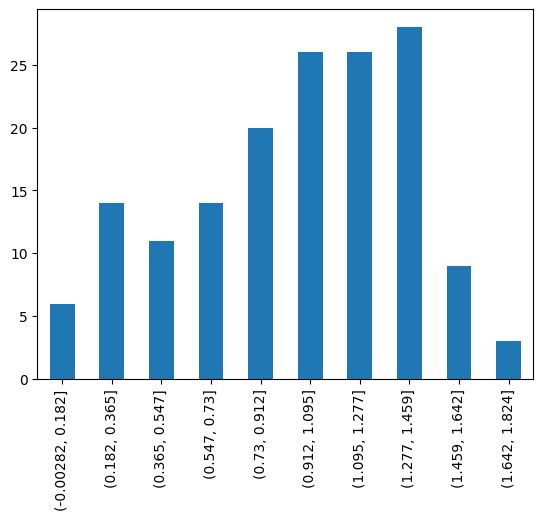

In [114]:
# Visualisasi data
# Value GDP dibagi menjadi 10 range setara
# Lalu divisualisasikan menggunakan grafik bar
data["gdp"].value_counts(bins=10, sort=False).plot(kind="bar")

Bisa dilihat dari visualisasi. Banyak negara dengan GDP menengah ke atas. Akan tetapi sedikit sekali negara dengan GDP sangat tinggi. Negara dengan GDP menengah kebawah juga lumayan banyak.

Grafik bisa dilihat menyerupai grafik distribusi normal. Sehingga menurut saya data ini cukup seimbang dan bisa digunakan untuk analisis dengan baik.

##### Variabel 2: **h_score**



Happiness Score (h_score) bertipe float positif, non-null (sudah terverifikasi).

Berikut analisis statistikanya:

In [115]:
data["h_score"].describe()

count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: h_score, dtype: float64

Dari 157 entry, didapatkan:
* Rata-rata = 5.382
* Nilai min = 2.905
* Nilai Max = 7.526

<Axes: >

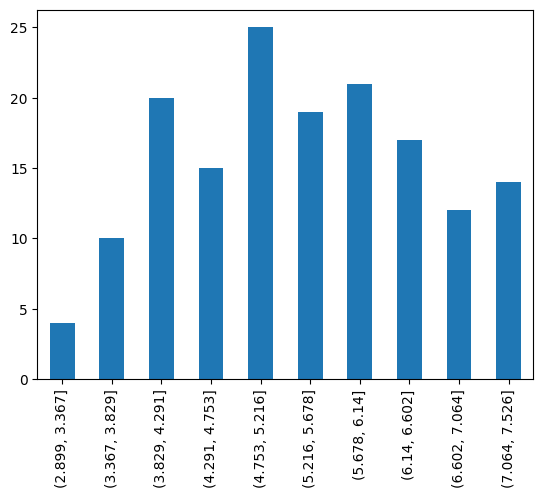

In [116]:
# Visualisasi data
# Value h_score dibagi menjadi 10 range setara
# Lalu divisualisasikan menggunakan grafik bar
data["h_score"].value_counts(bins=10, sort=False).plot(kind="bar")

Score kebahagiaan ini distribusinya cukup seimbang. Dengan cenderung agak banyak di sisi score tinggi yang tidak terlalu extreme.

Grafik bisa dilihat menyerupai grafik distribusi normal. Sehingga menurut saya data ini cukup seimbang dan bisa digunakan untuk analisis dengan baik.

### Bivariate Analysis

Analisis hubungan antara happiness score sebuah negara dengan GDP nya bisa dilakukan dengan visualisasi Correlation Heatmap.

In [117]:
# Buat Correlation Table menggunakan metode pearson
pear_corr = data.corr(method="pearson").style.background_gradient(cmap='Greens', axis=0)
pear_corr

,gdp,h_score
gdp,1.000000,0.790322
h_score,0.790322,1.000000


Bisa dilihat korelasi antara h_score dan gdp lumayan signifikan dengan nilai ***0.790322***

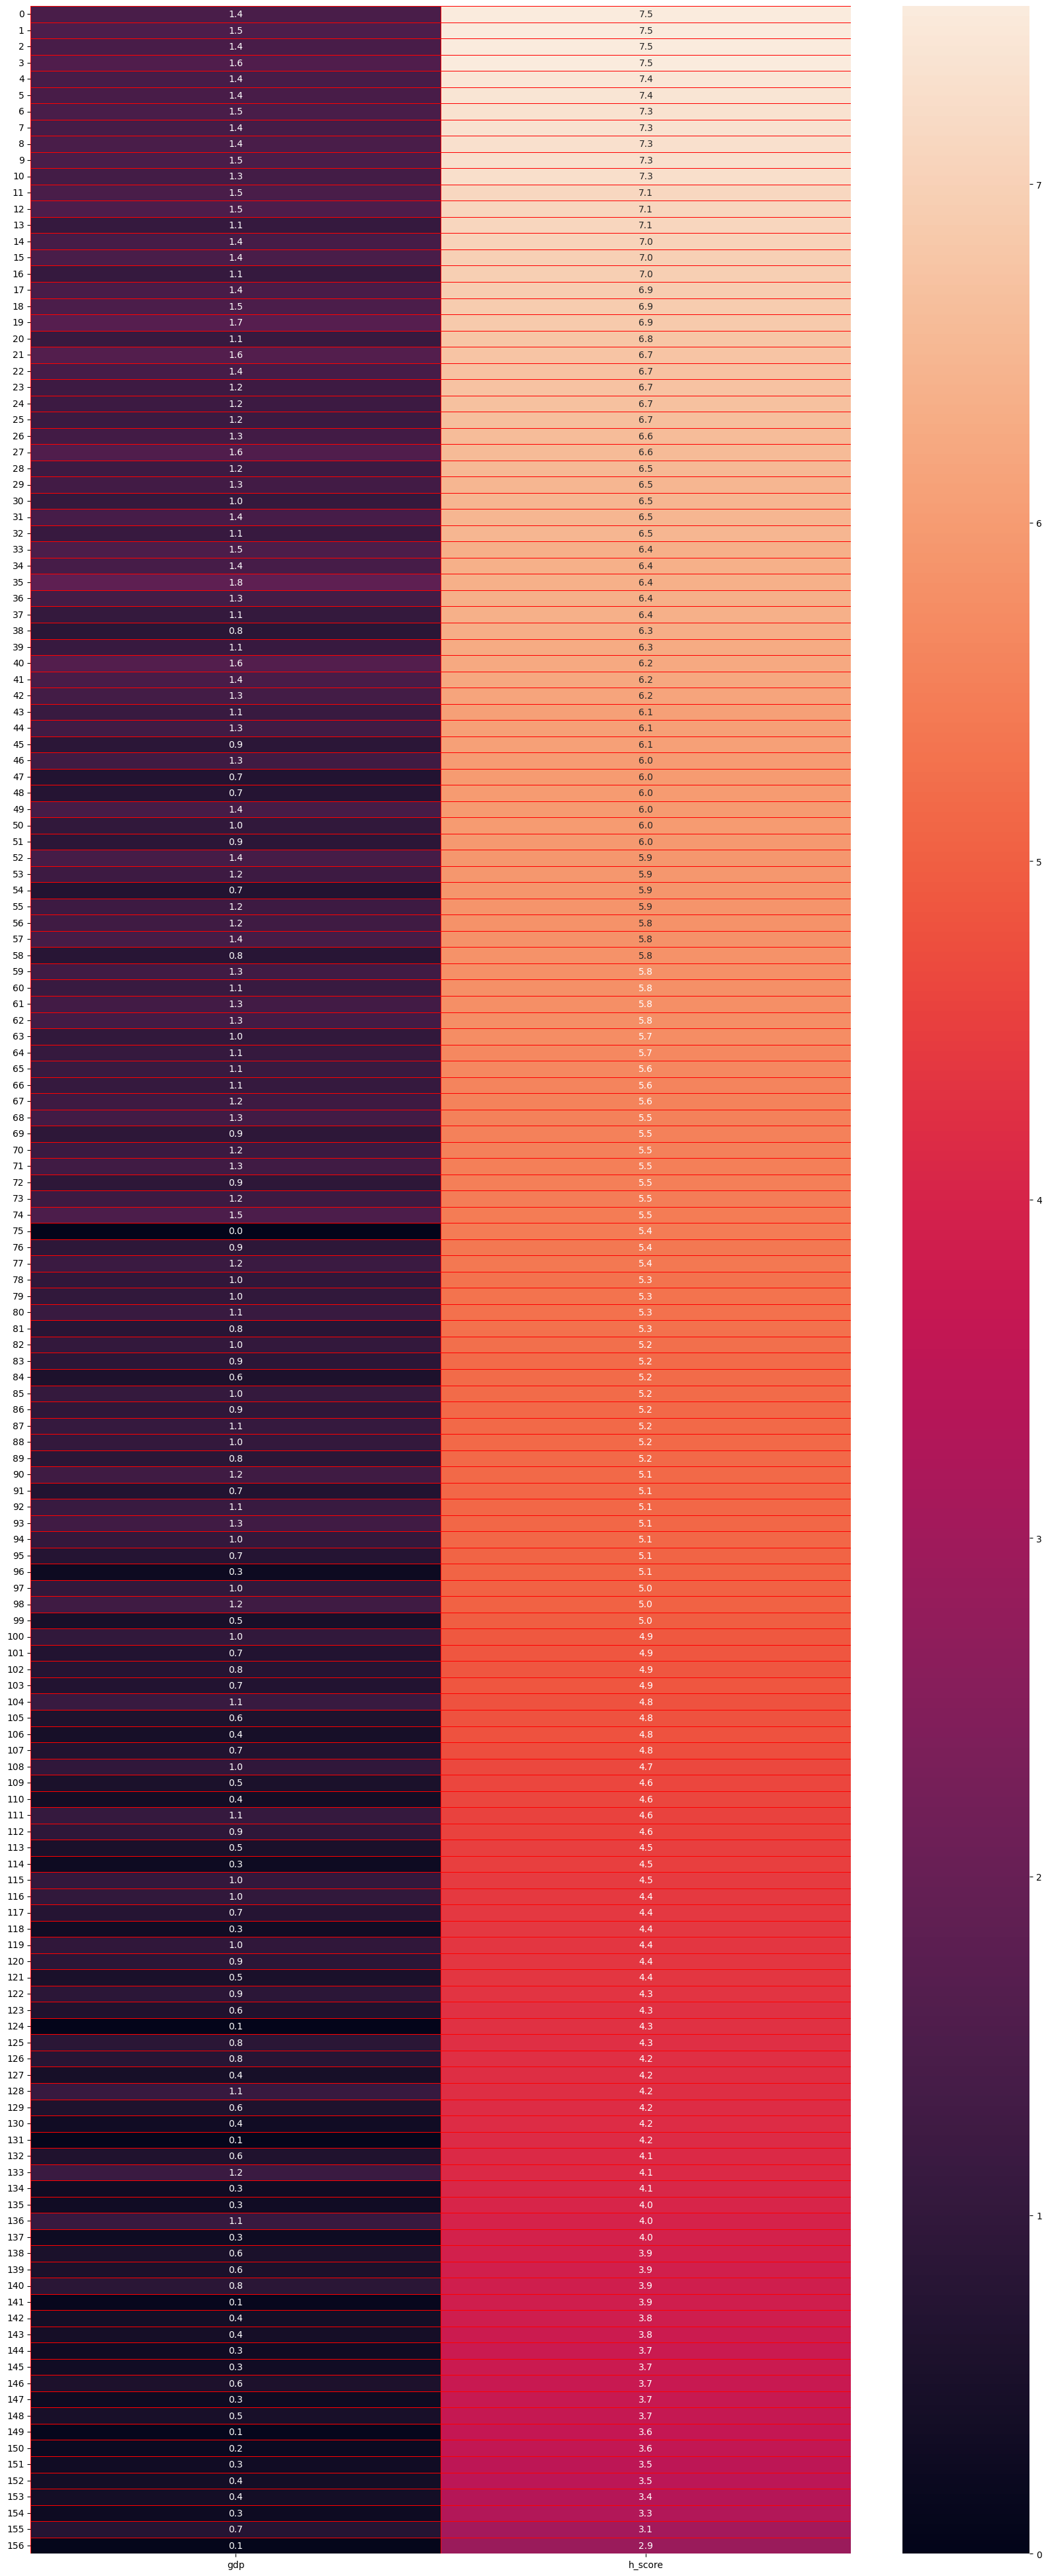

In [118]:
# Correlation heatmap dengan seaborn
f,ax = plt.subplots(figsize=(20, 50))
sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

Selain itu hubungan keduanya juga bisa dilihat melalui scatter plot berikut

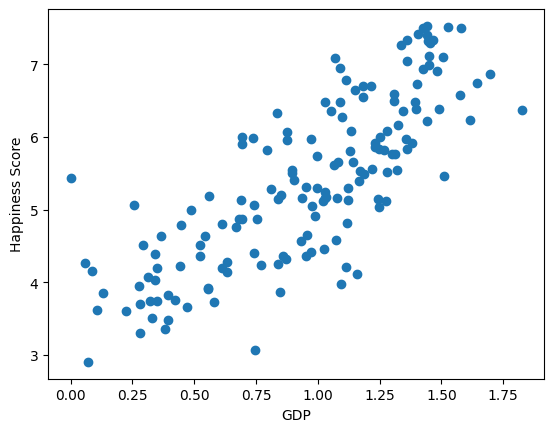

In [119]:
plt.scatter(data.gdp, data.h_score)
plt.xlabel("GDP")
plt.ylabel("Happiness Score")
plt.show()

### Kesimpulan

Dari analisis diatas, semua data saya rasa cukup terdistribusi dengan baik. Selain itu berdasarkan correlation heatmap metode Pearson, h_score dan gdp memiliki nilai korelasi yang cukup signifikan.

Membangun model regresi linear menggunakan data ini, menurut saya akan cenderung mudah karena data yang bagus dan kompleksitas yang rendah.

## Model Creation

### Definisi Regresi Linear Anda

Data terdiri dari 2 variabel numeral yang memiliki range tentu. Sehingga metode simple linear regression adalah pilihan paling baik menurut saya di kasus ini.

### Model Fitting, Creation, and Visualization

In [120]:
# Import Model LinearRegression dari Sklearn untuk pelatihan model
from sklearn.linear_model import LinearRegression

In [121]:
# Setup data GDP dan H-score untuk sumbu x dan y
linear_reg = LinearRegression()
x = data.gdp.values.reshape(-1,1)
y = data.h_score.values.reshape(-1,1)

Fitting Data

In [122]:
linear_reg.fit(x,y)

LinearRegression()

## Model Testing

Evaluasi Model dengan test case prediksi happiness score berdasarkan GDP negara yang diberikan.

In [123]:
# Program Batch Test Model
import random

N_TEST = 20

# Prediksi Setiap H-Score berdasarkan GDP menggunakan model sebanyak N kali
result = dict()
for i in range(N_TEST):
  test_gdp = random.uniform(0, 2)
  prediction_hscore = linear_reg.predict([[test_gdp]])
  result[test_gdp] = prediction_hscore[0][0]
  
result

{1.4026048026787934: 6.363484898902138,
 1.5820184003888833: 6.755837897211831,
 0.9969470577100557: 5.476366895821809,
 1.4268641670909745: 6.41653681071758,
 1.9243779116946524: 7.5045313210944125,
 1.0092661289008837: 5.5033070195348515,
 0.2899053419125106: 3.9301633713182995,
 0.06415907654111819: 3.436487166135664,
 0.1967127001997493: 3.7263638106211987,
 1.809065646101365: 7.252359168454582,
 0.05919176033503759: 3.4256243250139042,
 0.6555649632530498: 4.729810948898082,
 1.3234565684859614: 6.1903985364812995,
 0.3239866053295348: 4.0046944328349365,
 1.3351804868511248: 6.21603714236859,
 0.06362457786631293: 3.4353182906416713,
 1.097092850133924: 5.695372046084147,
 1.2031397119894802: 5.927282028055492,
 1.0089132384525135: 5.502535296392013,
 0.07387539984166946: 3.4577354362120363}

Visualisasikan Hasil Test

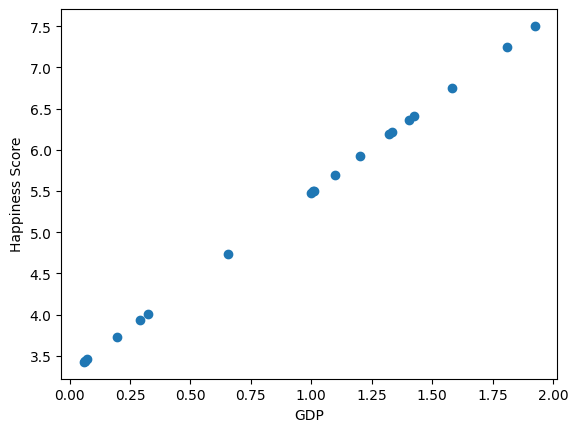

In [124]:
plt.scatter(result.keys(), result.values())
plt.xlabel("GDP")
plt.ylabel("Happiness Score")
plt.show()

Hasil Visualisasi menggambarkan model linear yang sudah ***berhasil*** dilatih